In [ ]:
from google.colab import files
import pandas as pd

# Upload file manually
uploaded = files.upload()

# Read the CSV
df = pd.read_csv("gender_submission.csv")
df.head()


Saving gender_submission.csv to gender_submission (1).csv


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
df.isnull().sum()


,0
PassengerId,0
Survived,0


In [ ]:
df['PassengerId'] = df['PassengerId'].fillna(df['PassengerId'].mean())


In [ ]:
df['PassengerId'] = df['PassengerId'].fillna(df['PassengerId'].median())


In [ ]:
df['Survived'] = df['Survived'].fillna(df['Survived'].mode()[0])


In [ ]:
df = df.dropna(axis=0)  # drop rows with NaN
df = df.dropna(axis=1)  # drop columns with NaN


In [ ]:
from google.colab import files
import pandas as pd

# Upload file manually (choose car.data)
uploaded = files.upload()

# Load dataset into DataFrame
columns = ['buying','maint','doors','persons','lug_boot','safety','class']
df = pd.read_csv("car.data", names=columns)

print(df.shape)
df.head()


Saving car.data to car (1).data
(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_label = df.copy()
label_encoders = {}

for col in df_label.columns:
    le = LabelEncoder()
    df_label[col] = le.fit_transform(df_label[col])
    label_encoders[col] = le

df_label.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [ ]:
df_onehot = pd.get_dummies(df, drop_first=False)
df_onehot.head()


,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,class_acc,class_good,class_unacc,class_vgood
0,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,True,False,False,False,True,False
1,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,True,False,False,True,False
2,False,False,False,True,False,False,False,True,True,False,...,False,False,True,True,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,True,False,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False


In [ ]:
print("Original shape:", df.shape)
print("Label Encoded shape:", df_label.shape)
print("One-Hot Encoded shape:", df_onehot.shape)


Original shape: (1728, 7)
Label Encoded shape: (1728, 7)
One-Hot Encoded shape: (1728, 25)


Analysis of Data Distribution
The following plots show the distribution of each feature before and after scaling.


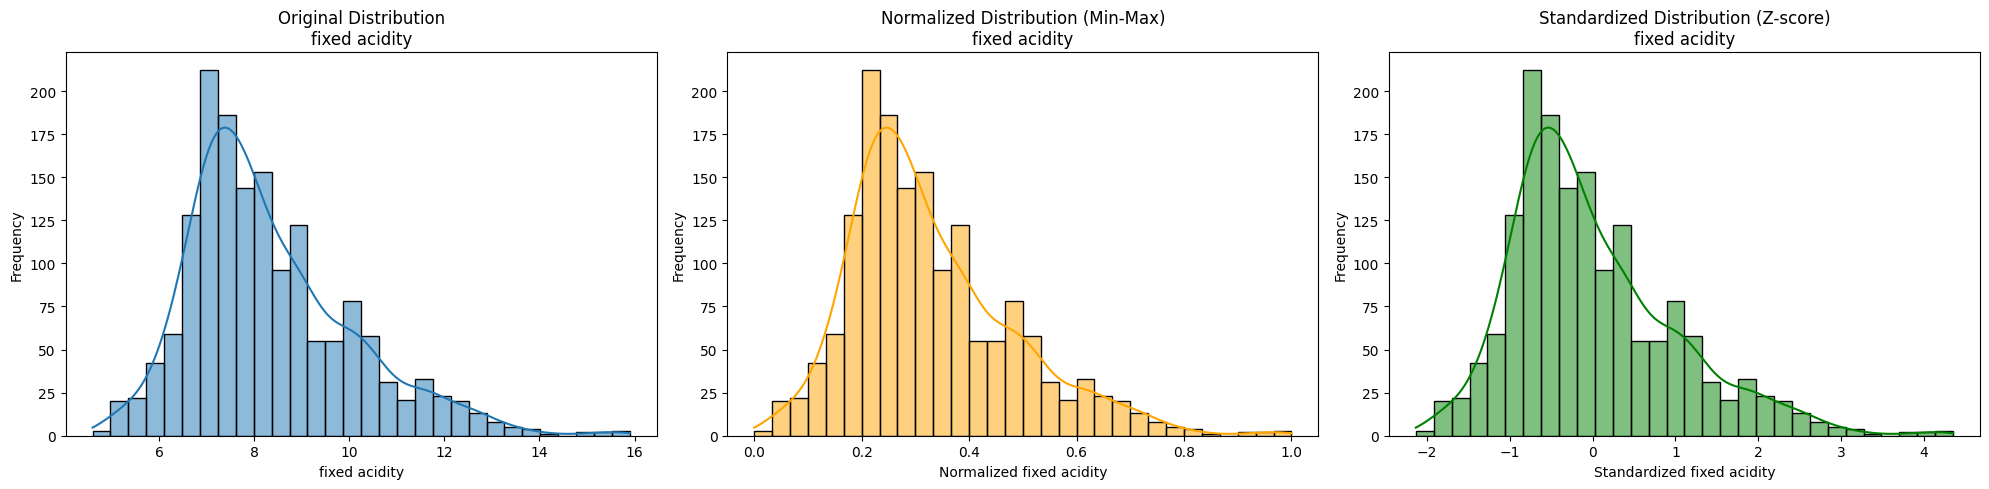

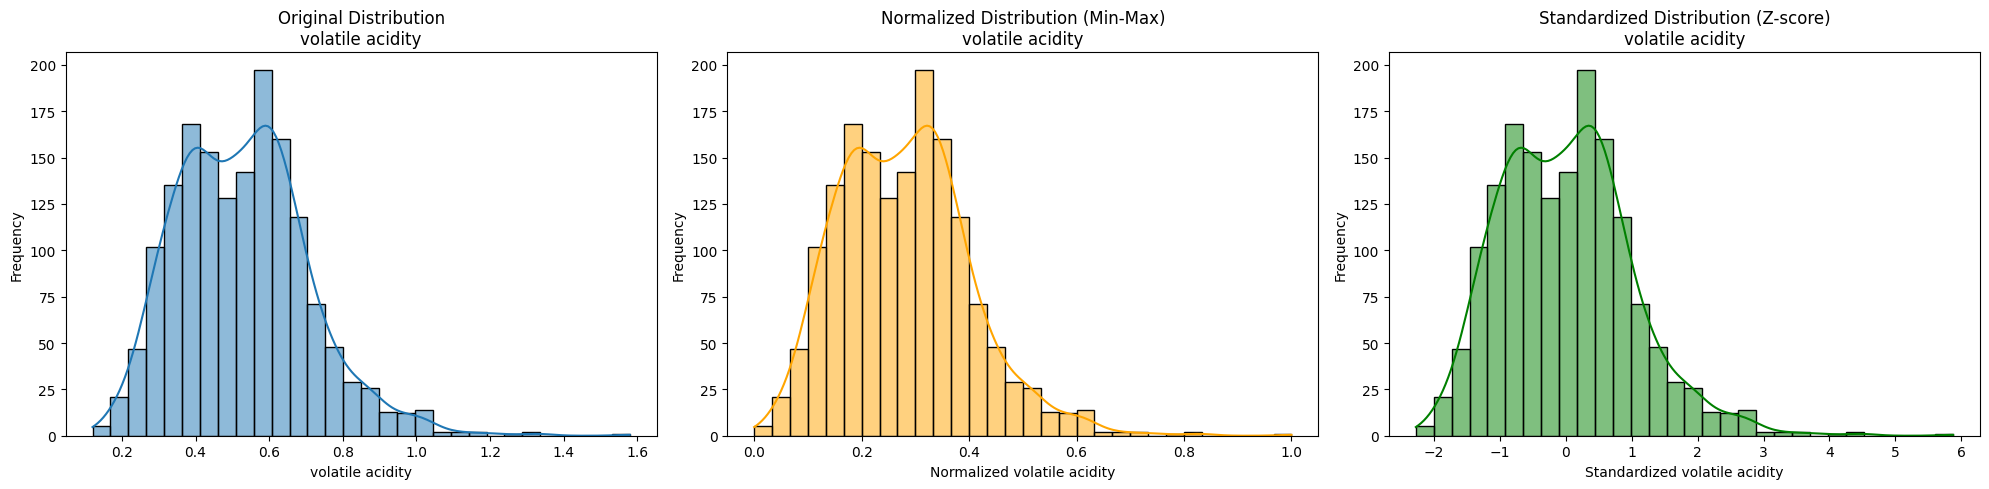

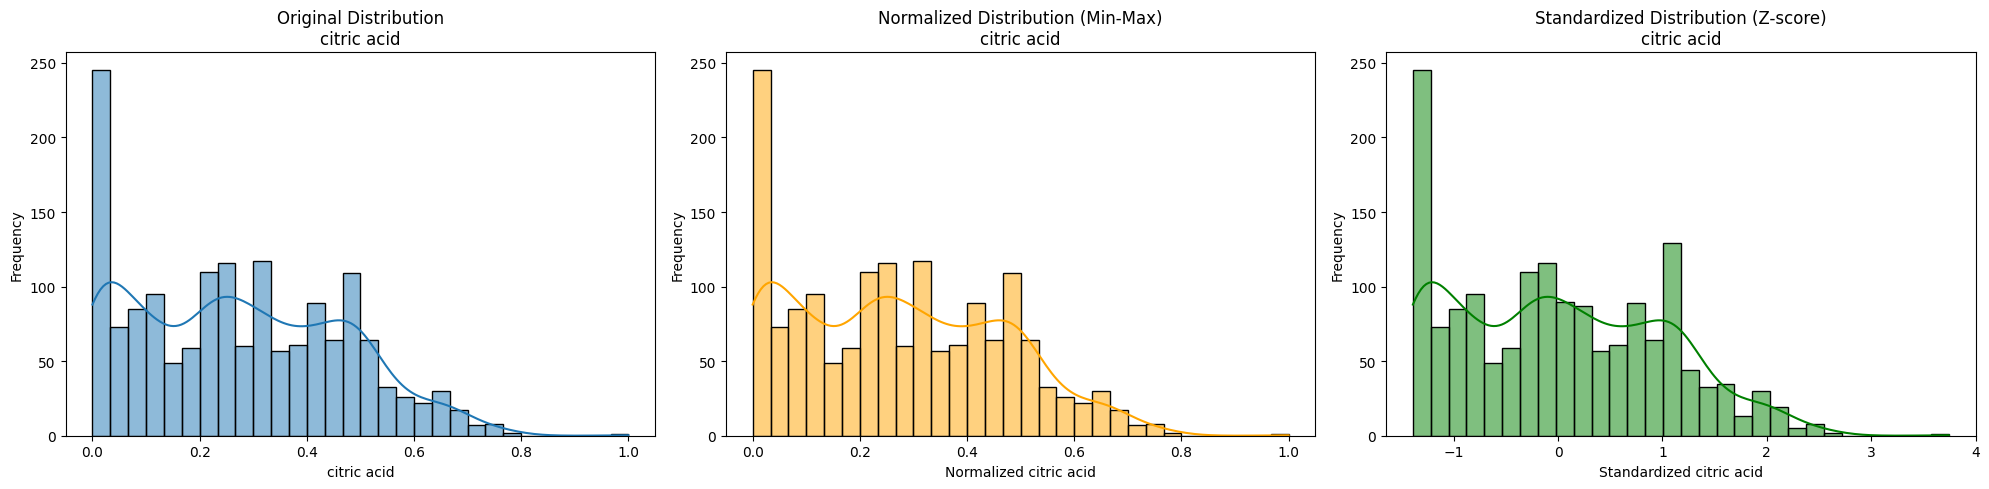

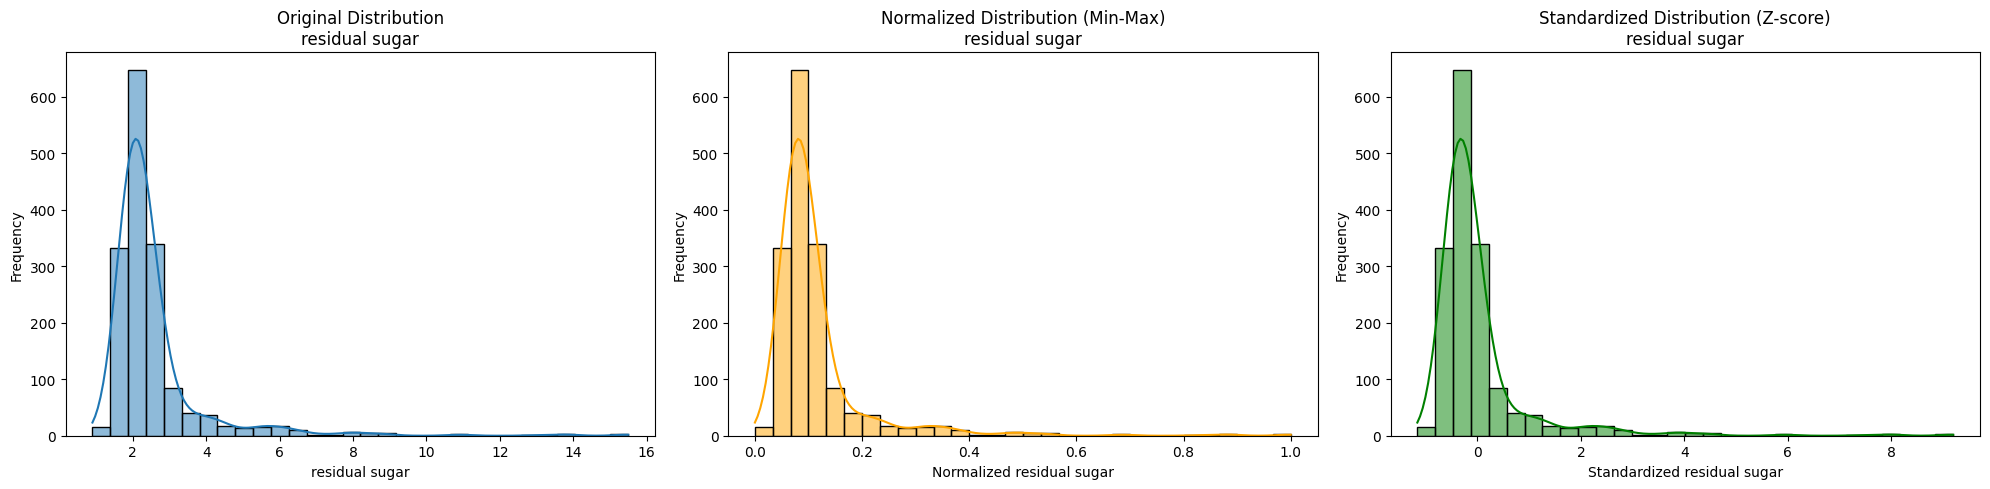

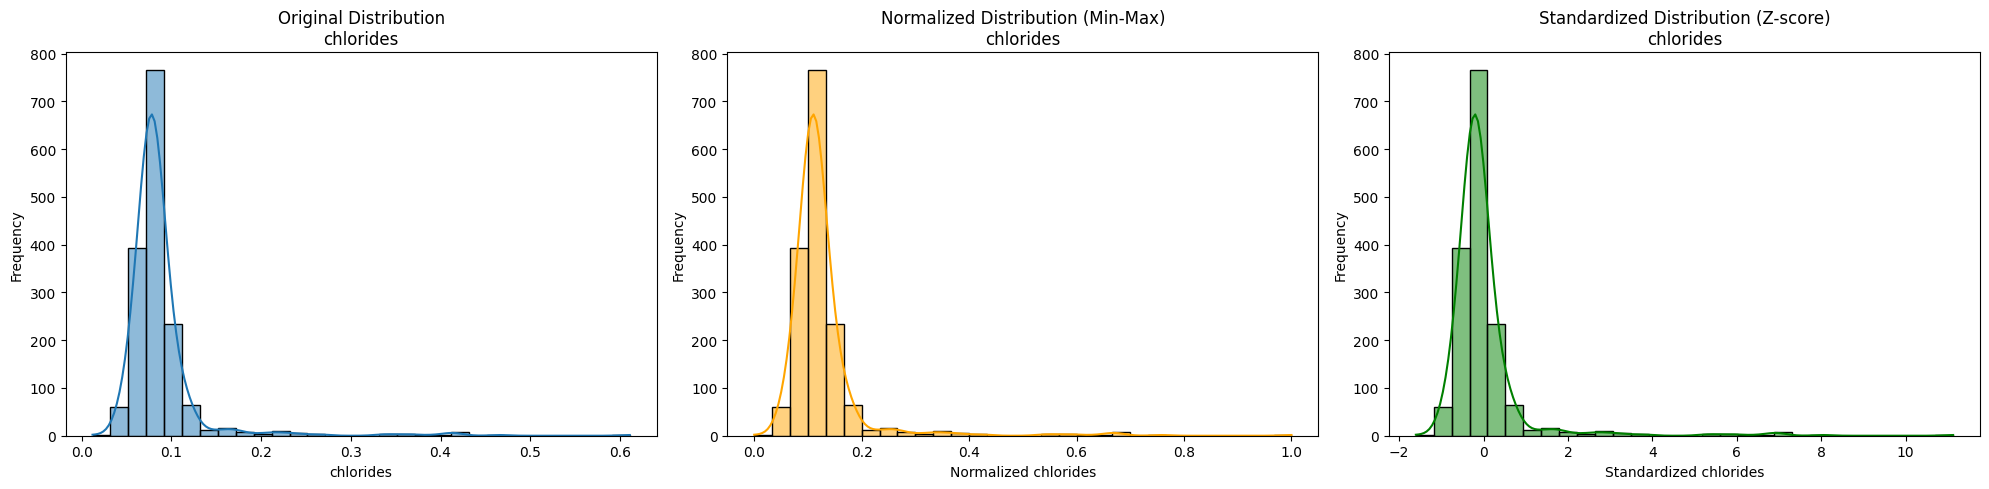

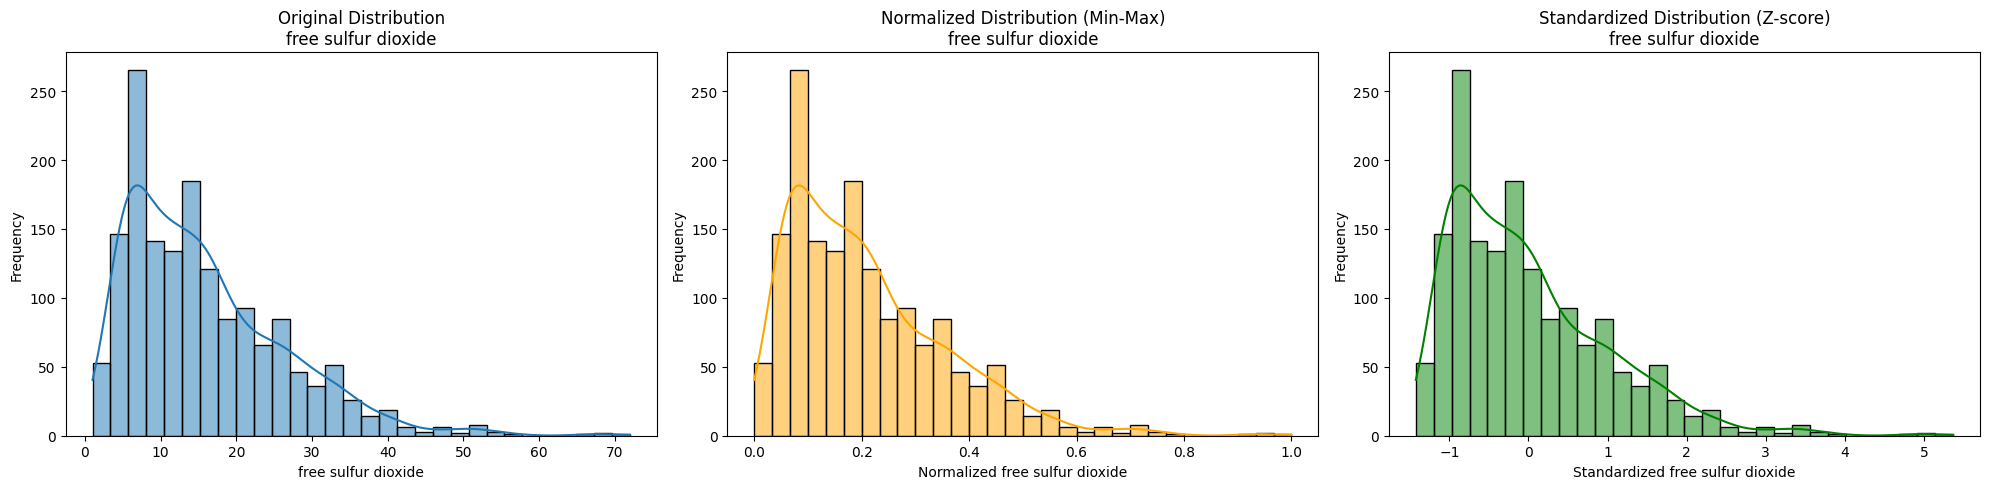

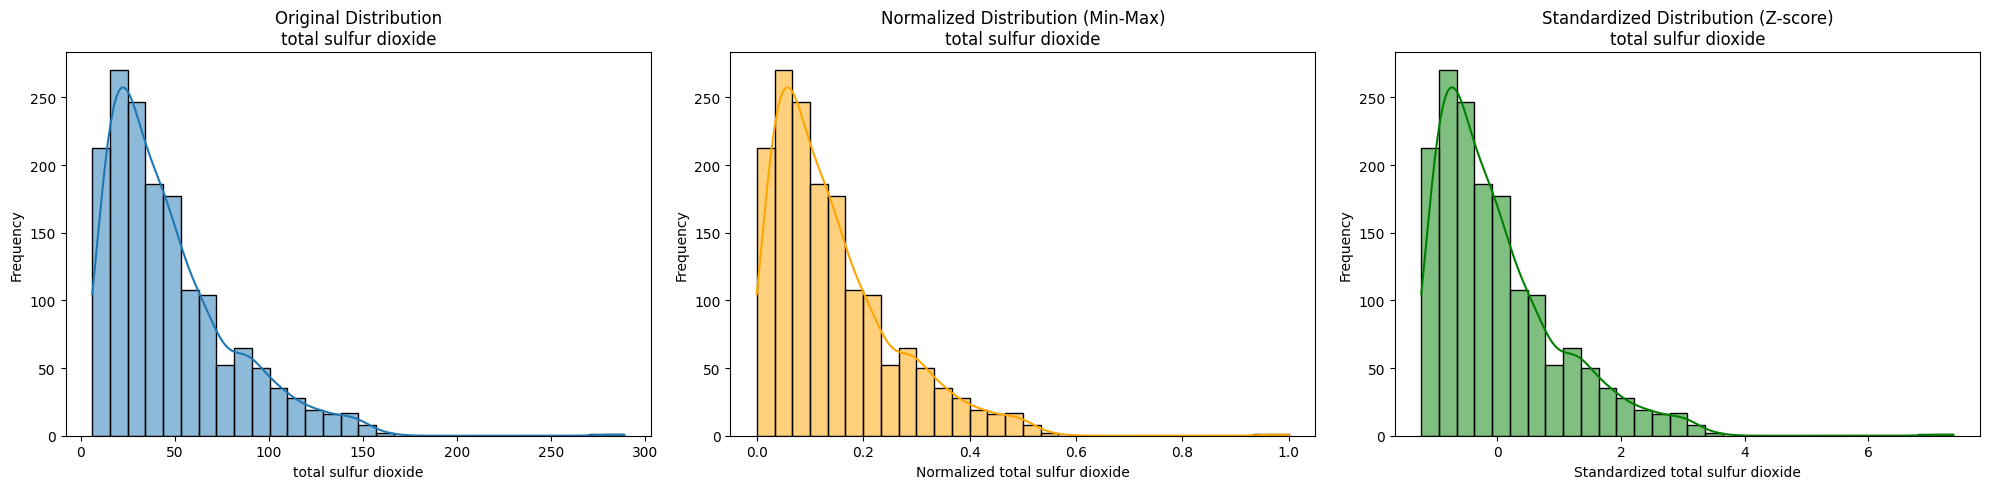

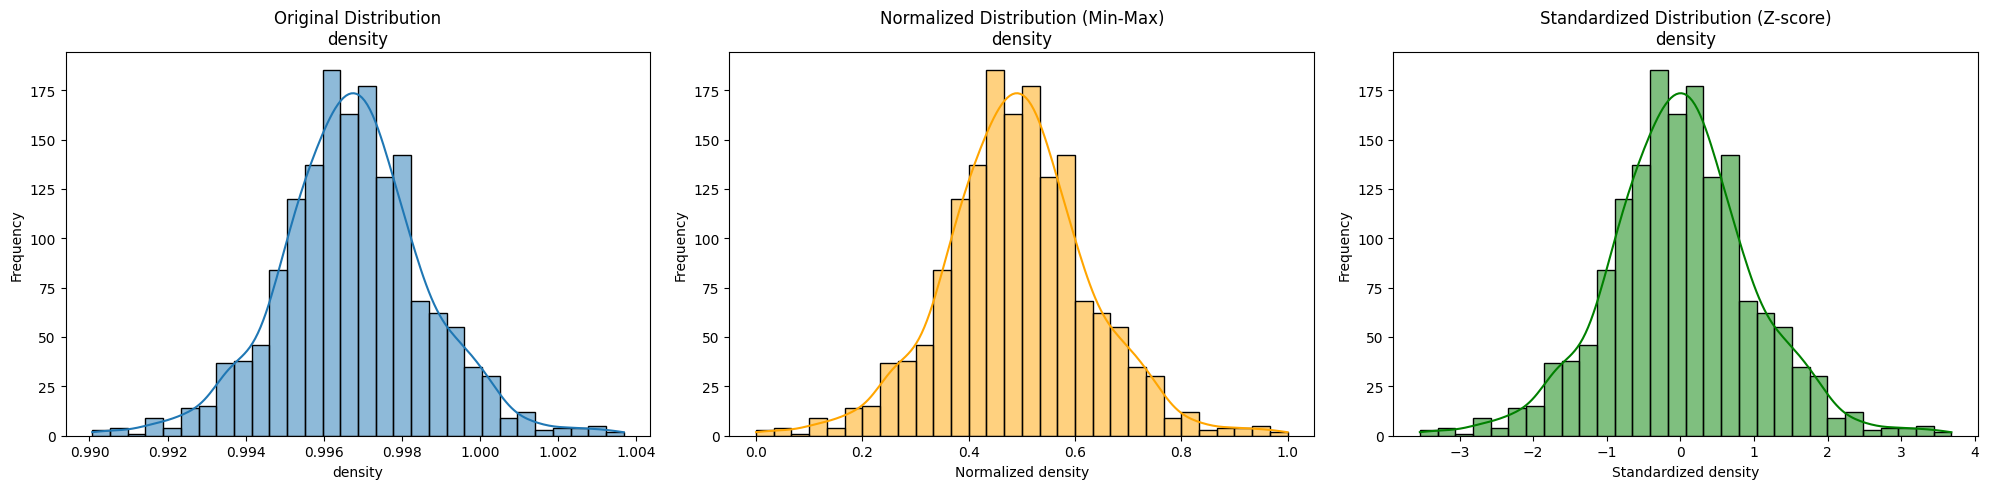

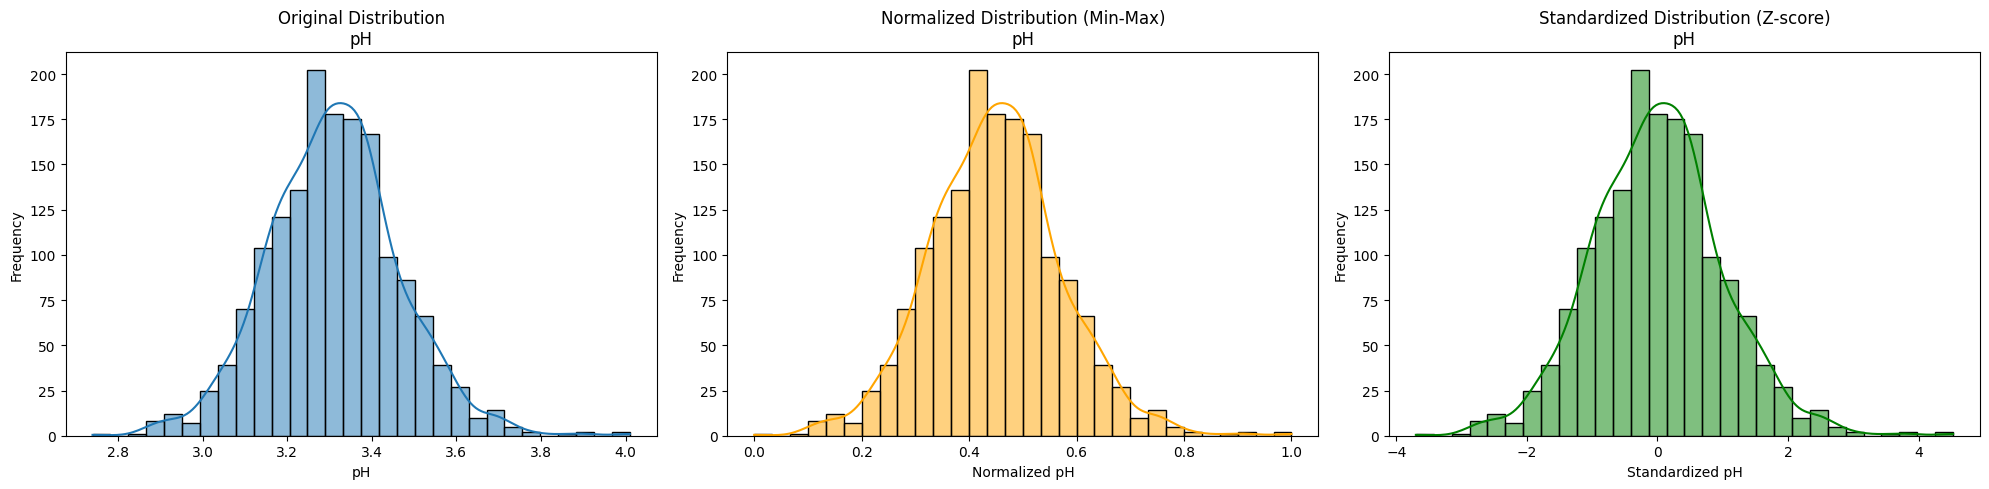

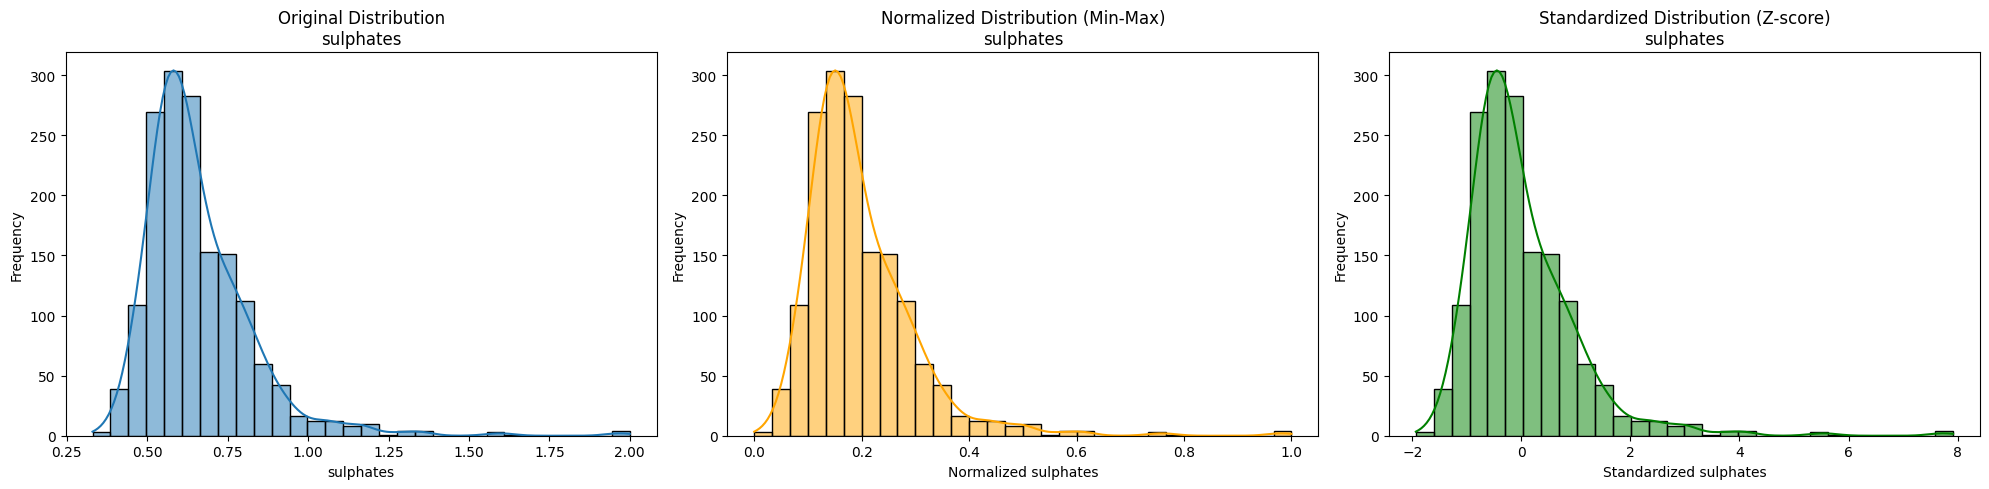

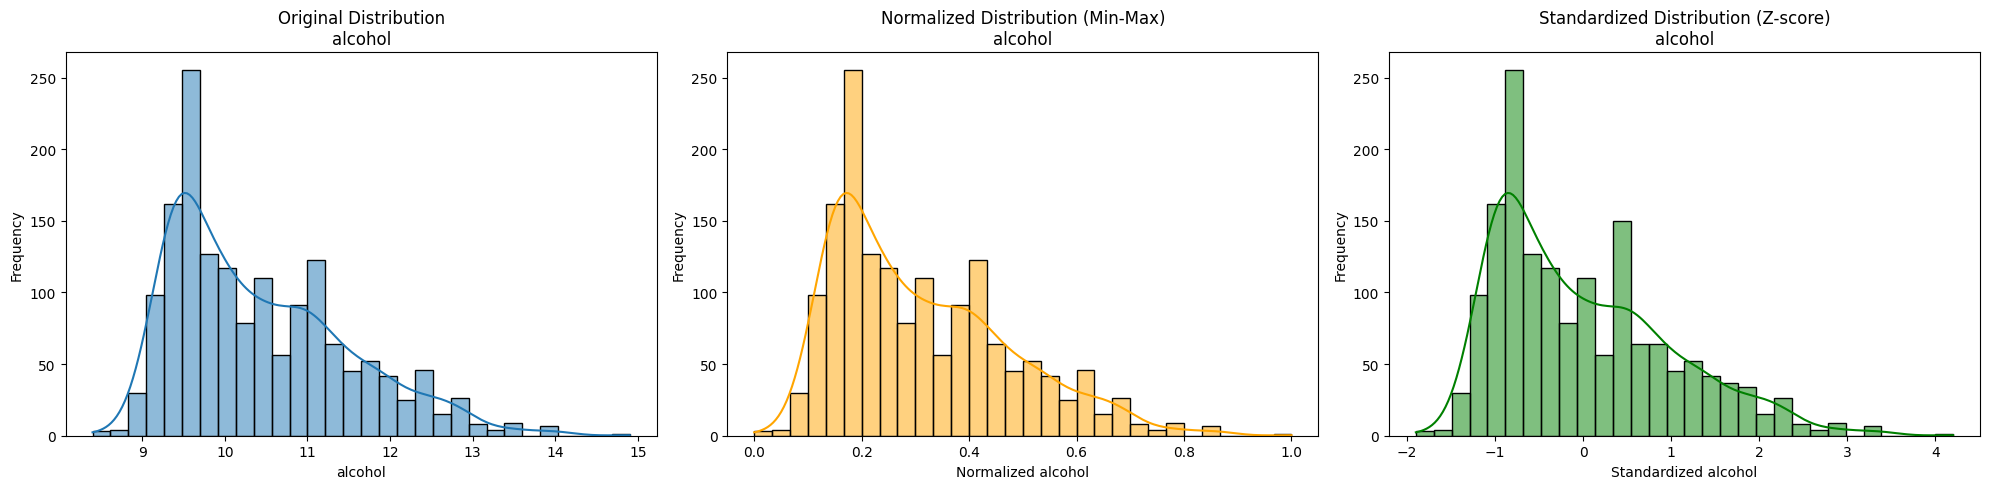

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data from the CSV file you uploaded to Colab
try:
    df = pd.read_csv('winequality-red.csv', sep=';')
except FileNotFoundError:
    print("Error: 'winequality-red.csv' not found.")
    print("Please make sure you have uploaded the file to your Colab environment and that the name matches exactly.")
else:
    # 2. We will not scale the 'quality' column as it is the target variable.
    features_to_scale = df.columns.drop('quality')
    features_df = df[features_to_scale]

    # 3. Apply Min-Max Normalization
    # This scales the data to a fixed range, usually [0, 1].
    min_max_scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(min_max_scaler.fit_transform(features_df), columns=features_to_scale)

    # 4. Apply Z-score Standardization
    # This scales the data to have a mean of 0 and a standard deviation of 1.
    standard_scaler = StandardScaler()
    df_standardized = pd.DataFrame(standard_scaler.fit_transform(features_df), columns=features_to_scale)

    # 5. Analyze the effect on data distribution by plotting
    print("Analysis of Data Distribution")
    print("="*30)
    print("The following plots show the distribution of each feature before and after scaling.")

    for column in features_to_scale:
        plt.figure(figsize=(20, 5))

        # Original Distribution
        plt.subplot(1, 3, 1)
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'Original Distribution\n{column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Normalized Distribution
        plt.subplot(1, 3, 2)
        sns.histplot(df_normalized[column], kde=True, bins=30, color='orange')
        plt.title(f'Normalized Distribution (Min-Max)\n{column}')
        plt.xlabel(f'Normalized {column}')
        plt.ylabel('Frequency')

        # Standardized Distribution
        plt.subplot(1, 3, 3)
        sns.histplot(df_standardized[column], kde=True, bins=30, color='green')
        plt.title(f'Standardized Distribution (Z-score)\n{column}')
        plt.xlabel(f'Standardized {column}')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()



Error: 'boston_housing.csv' not found.
Please make sure you have uploaded the file to your Colab environment and that the name matches exactly.
Original DataFrame Head:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       

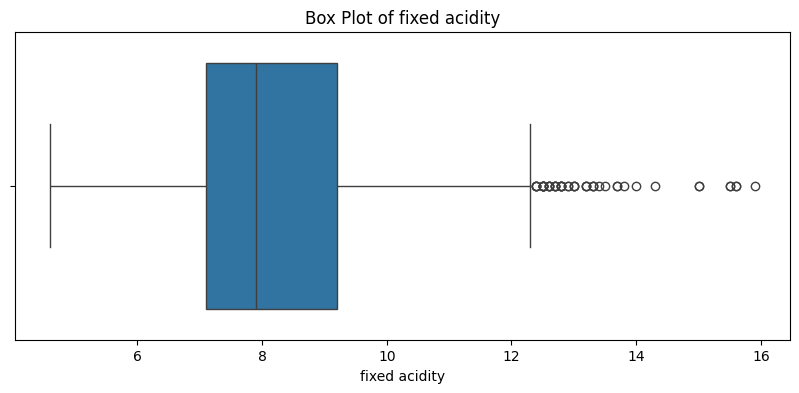

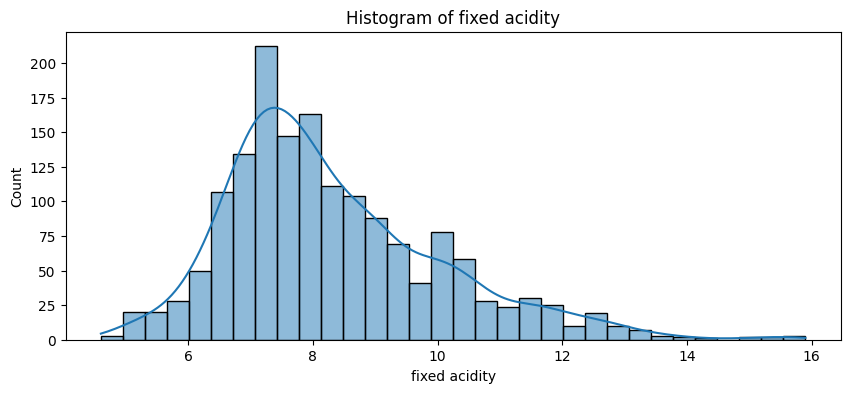

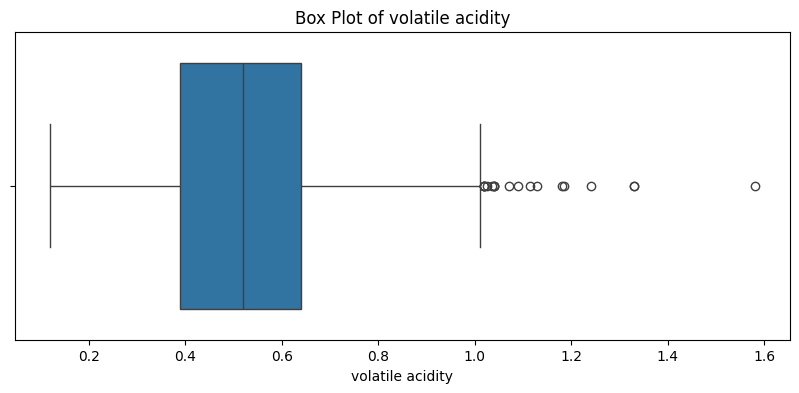

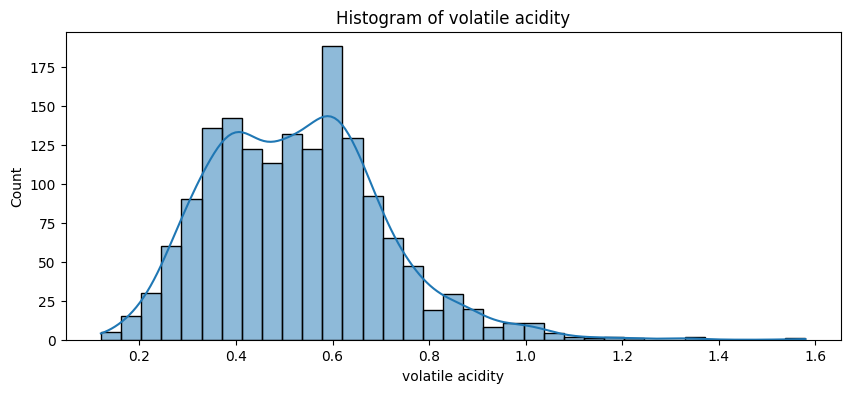

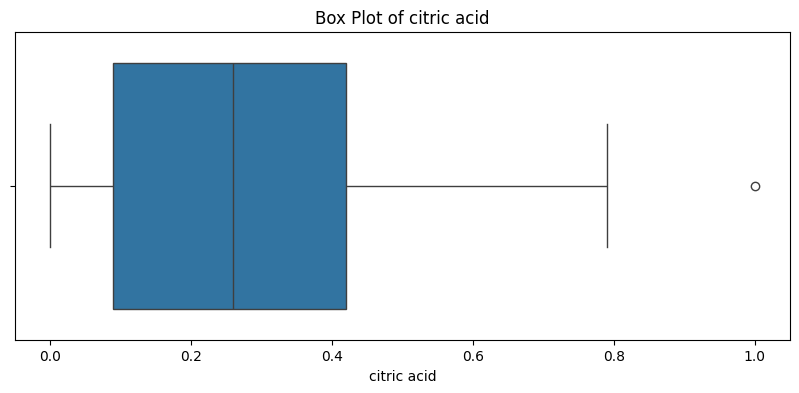

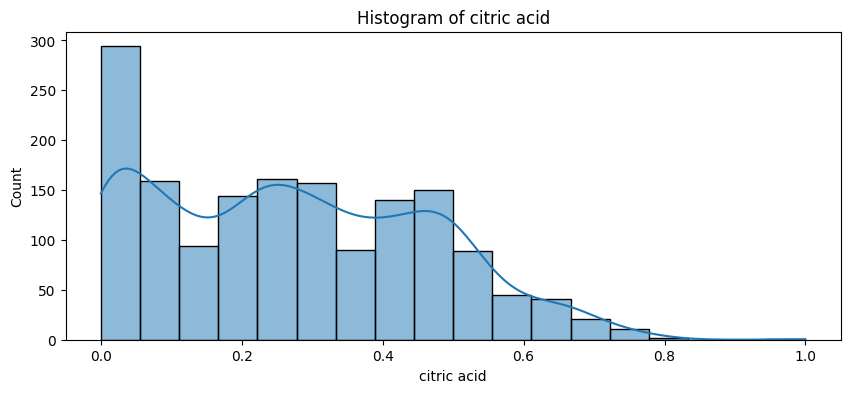

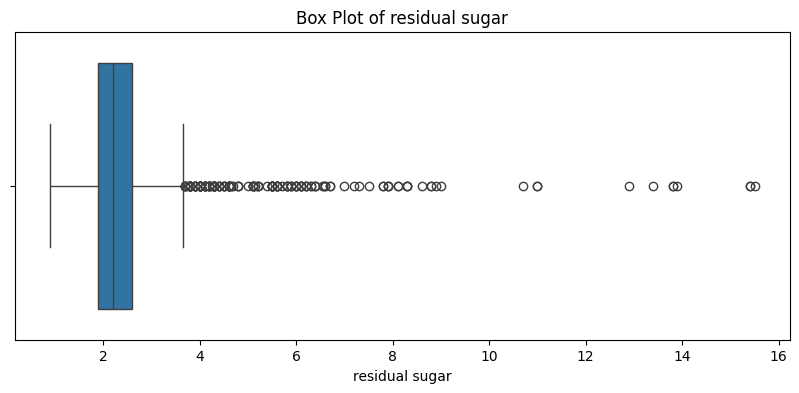

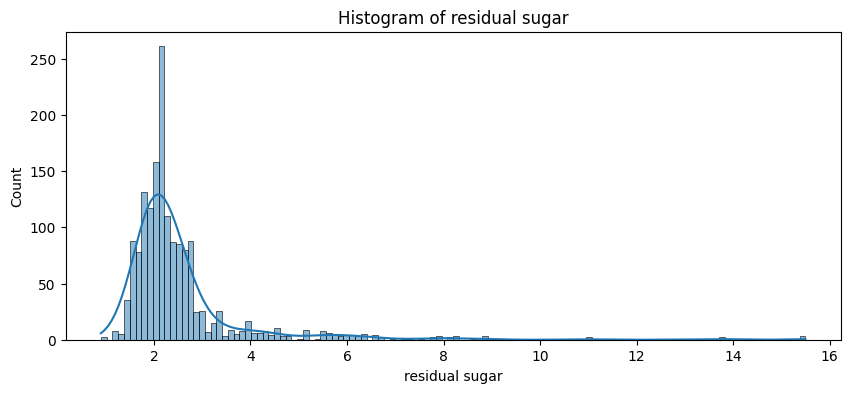

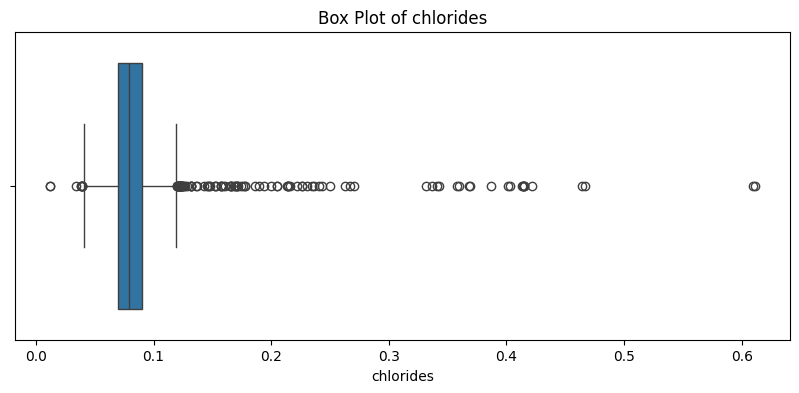

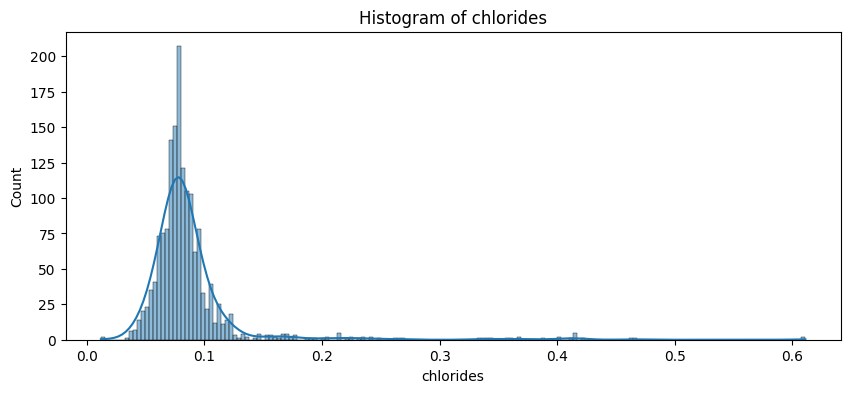

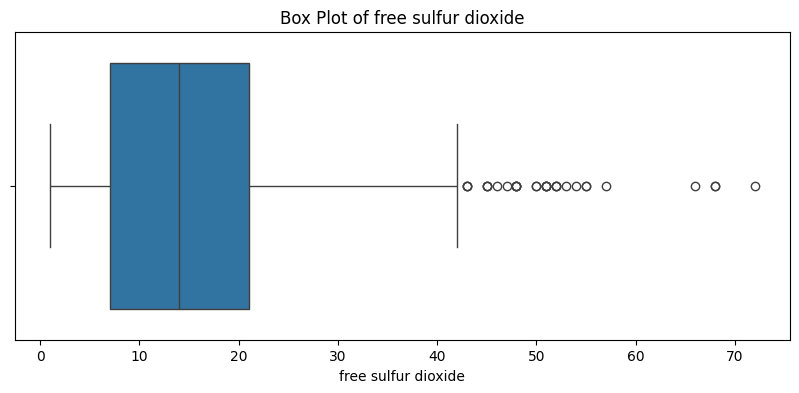

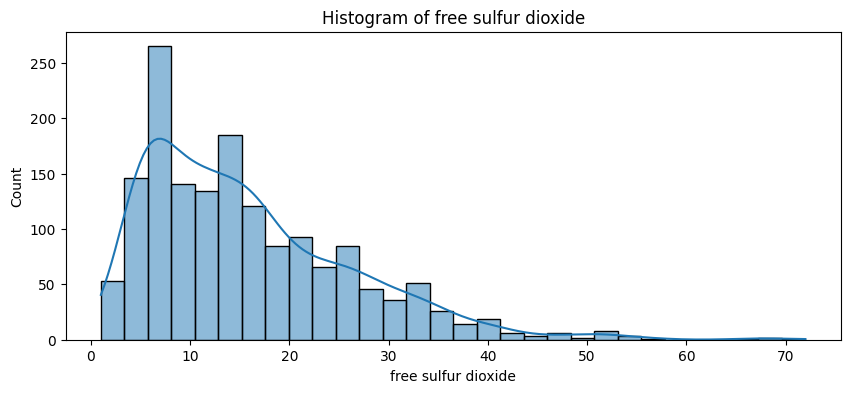

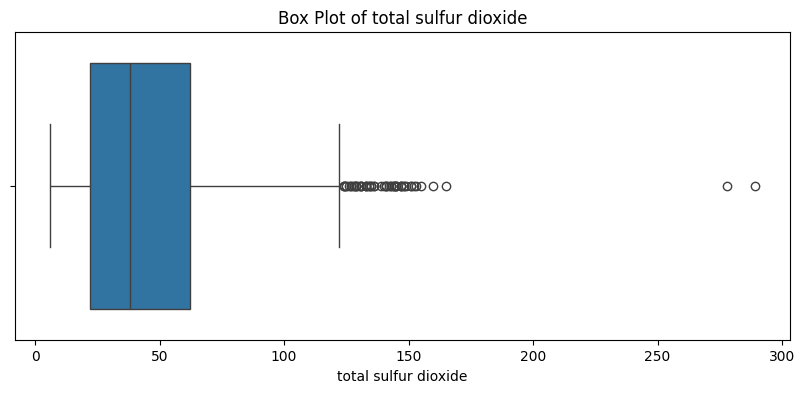

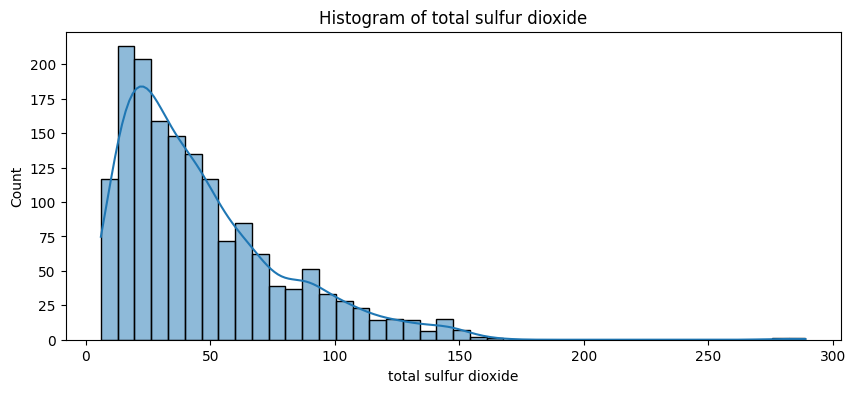

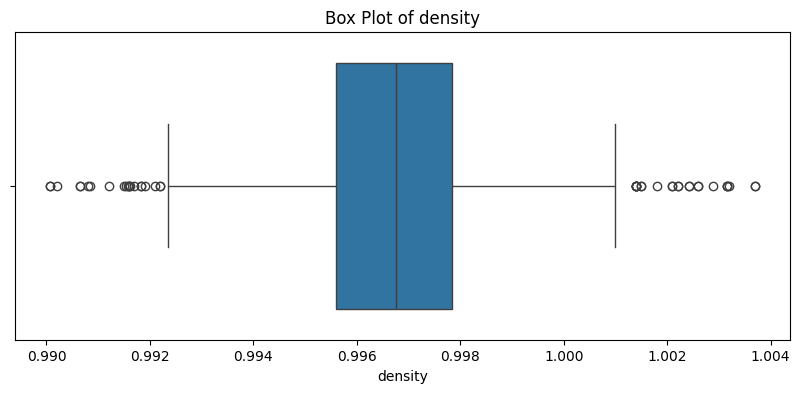

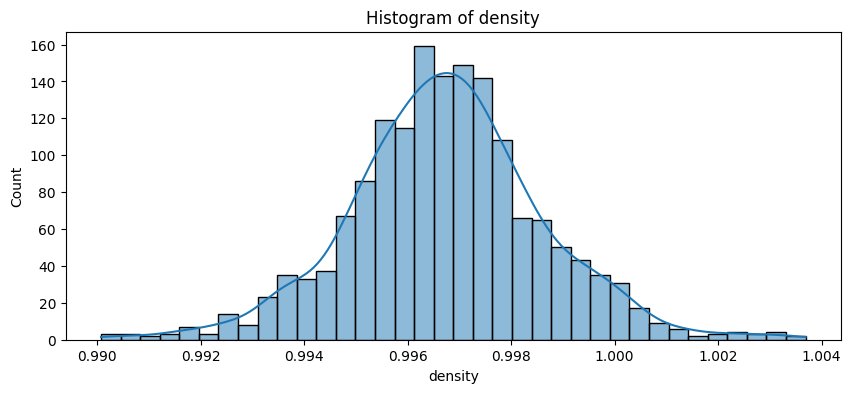

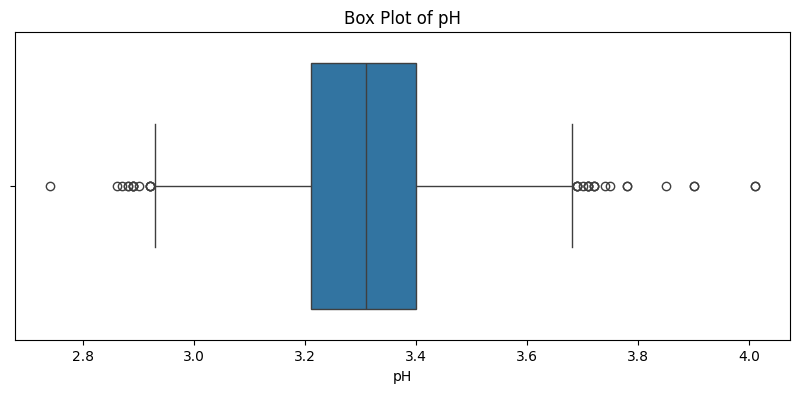

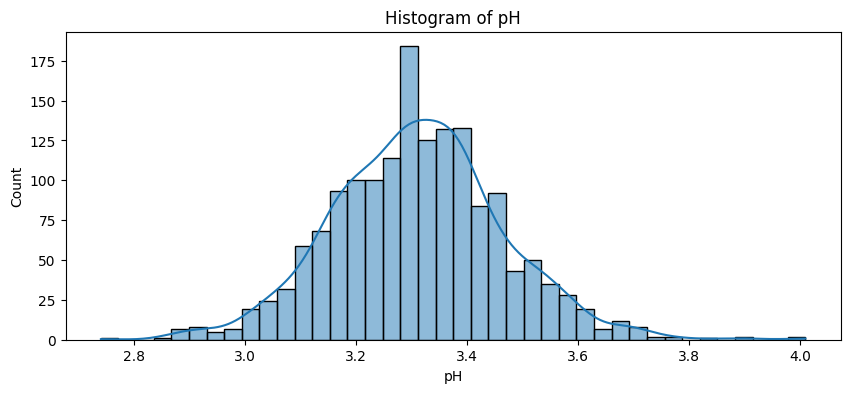

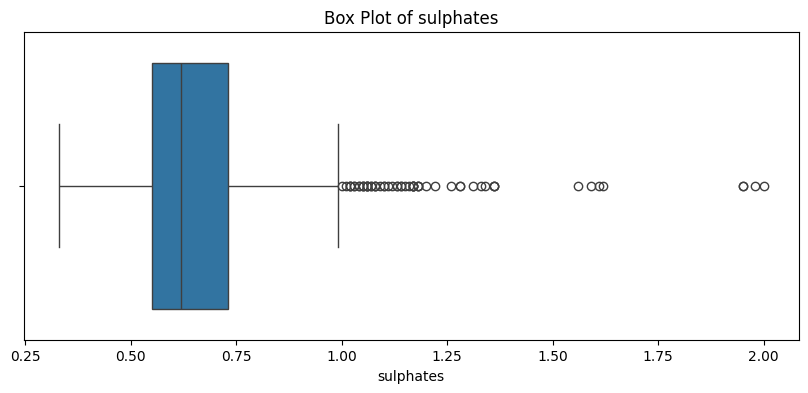

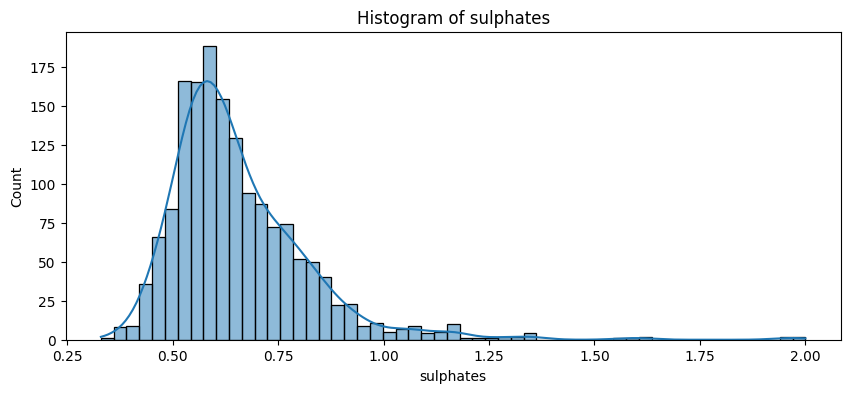

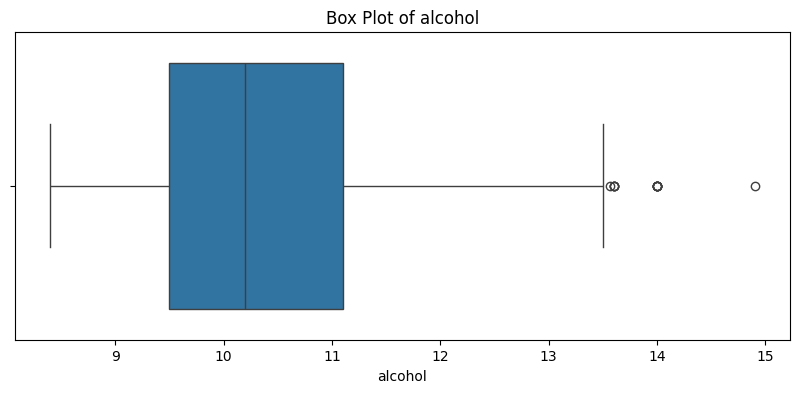

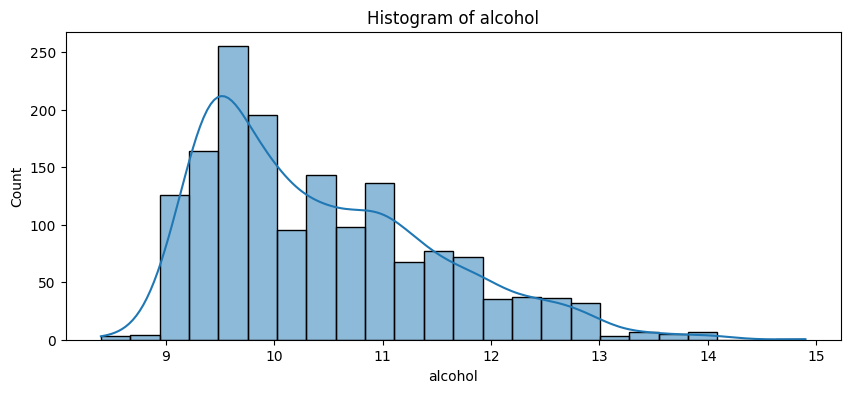

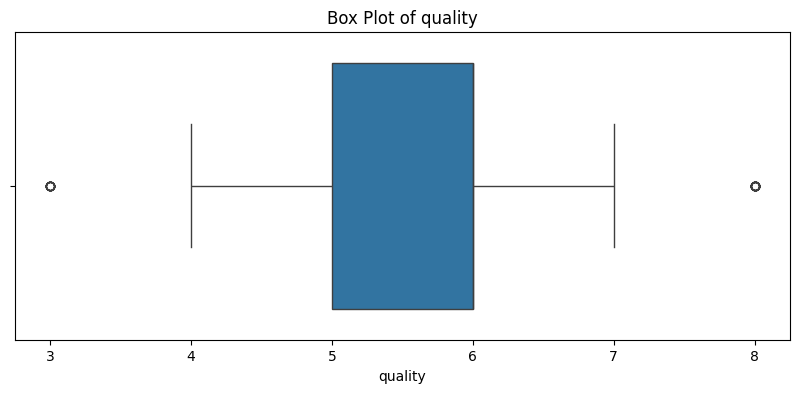

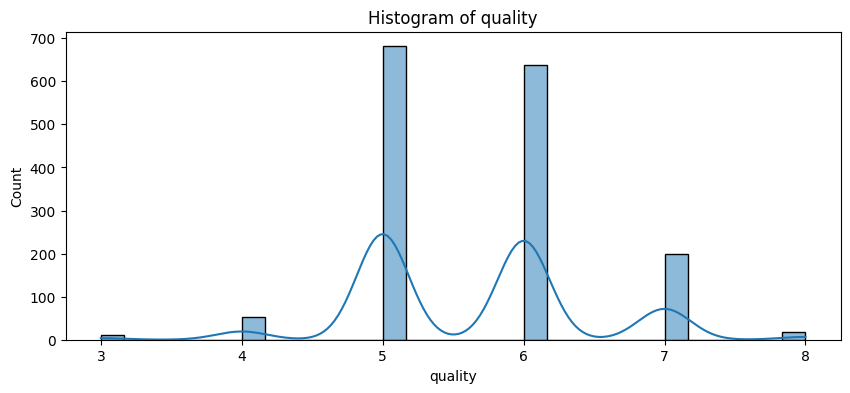


--- Z-score Method for Outlier Detection and Treatment ---
Outliers detected in 'fixed acidity' using Z-score > 3:
     fixed acidity  zscore_fixed acidity
243           15.0              3.838072
244           15.0              3.838072
347           13.8              3.148635
374           14.0              3.263541
381           13.7              3.091182
Outliers detected in 'volatile acidity' using Z-score > 3:
     volatile acidity  zscore_volatile acidity
38               1.13                 3.364062
120              1.07                 3.028873
126              1.33                 4.481357
127              1.33                 4.481357
199              1.09                 3.140603
Outliers detected in 'citric acid' using Z-score > 3:
     citric acid  zscore_citric acid
151          1.0            3.743574
Outliers detected in 'residual sugar' using Z-score > 3:
     residual sugar  zscore_residual sugar
33             10.7               5.790187
163             7.3       

/tmp/ipython-input-4166403324.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.652611705475142' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_zscore_treated.loc[col_zscore > z_score_threshold, column] = mean_non_outlier
/tmp/ipython-input-4166403324.py:98: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_iqr_treated.loc[df_iqr_treated[column] < lower_bound, column] = lower_bound


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dataset
try:
    # Assuming the user uploads the dataset to their Colab environment
    df = pd.read_csv('boston_housing.csv')
except FileNotFoundError:
    print("Error: 'boston_housing.csv' not found.")
    print("Please make sure you have uploaded the file to your Colab environment and that the name matches exactly.")
    exit()

print("Original DataFrame Head:")
print(df.head())
print("\nOriginal DataFrame Info:")
df.info()

# --- Visualization Methods for Outlier Detection ---
print("\n--- Visualizing Outliers ---")
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot of {column}')
        plt.show()

        plt.figure(figsize=(10, 4))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.show()

# --- Z-score Method ---
print("\n--- Z-score Method for Outlier Detection and Treatment ---")
# Calculate Z-scores for numerical columns
df_zscore = df.copy()
for column in df_zscore.columns:
    if df_zscore[column].dtype in ['int64', 'float64']:
        df_zscore[f'zscore_{column}'] = np.abs(zscore(df_zscore[column]))

# Define a threshold for outliers (e.g., Z-score > 3)
z_score_threshold = 3

outliers_zscore = pd.DataFrame()
for column in df_zscore.columns:
    if column.startswith('zscore_'):
        original_col = column.replace('zscore_', '')
        outliers_in_col = df_zscore[df_zscore[column] > z_score_threshold]
        if not outliers_in_col.empty:
            print(f"Outliers detected in '{original_col}' using Z-score > {z_score_threshold}:")
            print(outliers_in_col[[original_col, column]].head())
            outliers_zscore = pd.concat([outliers_zscore, outliers_in_col])

# Treatment: Capping outliers (replace with threshold value or mean/median)
# For simplicity, we'll cap them to the upper/lower bound defined by the Z-score threshold
df_zscore_treated = df.copy()
for column in df_zscore_treated.columns:
    if df_zscore_treated[column].dtype in ['int64', 'float64']:
        col_zscore = np.abs(zscore(df_zscore_treated[column]))
        # Replace outliers with the mean of the non-outlier data
        mean_non_outlier = df_zscore_treated[column][col_zscore <= z_score_threshold].mean()
        df_zscore_treated.loc[col_zscore > z_score_threshold, column] = mean_non_outlier

print("\nDataFrame after Z-score treatment (outliers replaced with mean of non-outliers):")
print(df_zscore_treated.head())

# --- IQR Method ---
print("\n--- IQR Method for Outlier Detection and Treatment ---")
df_iqr = df.copy()

outliers_iqr = pd.DataFrame()
for column in df_iqr.columns:
    if df_iqr[column].dtype in ['int64', 'float64']:
        Q1 = df_iqr[column].quantile(0.25)
        Q3 = df_iqr[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_in_col = df_iqr[(df_iqr[column] < lower_bound) | (df_iqr[column] > upper_bound)]
        if not outliers_in_col.empty:
            print(f"Outliers detected in '{column}' using IQR method:")
            print(outliers_in_col[[column]].head())
            outliers_iqr = pd.concat([outliers_iqr, outliers_in_col])

# Treatment: Capping outliers (replace with lower/upper bound)
df_iqr_treated = df.copy()
for column in df_iqr_treated.columns:
    if df_iqr_treated[column].dtype in ['int64', 'float64']:
        Q1 = df_iqr_treated[column].quantile(0.25)
        Q3 = df_iqr_treated[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_iqr_treated.loc[df_iqr_treated[column] < lower_bound, column] = lower_bound
        df_iqr_treated.loc[df_iqr_treated[column] > upper_bound, column] = upper_bound

print("\nDataFrame after IQR treatment (outliers capped to bounds):")
print(df_iqr_treated.head())

print("\n--- Comparison of Distributions After Treatment ---")
# Visualize distributions after treatment for a few columns
for column in ['CRIM', 'RM', 'LSTAT']:
    if column in df.columns and df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(18, 5))

        plt.subplot(1, 3, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Original {column}')

        plt.subplot(1, 3, 2)
        sns.histplot(df_zscore_treated[column], kde=True, color='orange')
        plt.title(f'Z-score Treated {column}')

        plt.subplot(1, 3, 3)
        sns.histplot(df_iqr_treated[column], kde=True, color='green')
        plt.title(f'IQR Treated {column}')

        plt.tight_layout()
        plt.show()


Original Dataset Shape: (1000, 11)

First few rows:
   product_id category      price  quantity_sold  discount_percent  \
0           1   Sports  62.187896              6         23.831527   
1           2    Books  74.515332              8          2.969059   
2           3     Home  69.620185              6          8.141442   
3           4    Books  64.477680              3         25.653283   
4           5    Books  44.190511              5         10.394079   

   customer_age  customer_income store_location  season  marketing_spend  \
0     74.038338     54787.536728          Rural    Fall       989.019201   
1     48.618169     75084.638405       Suburban  Spring       660.986749   
2     42.914084     66515.897458          Urban  Winter      1259.521447   
3     61.246861     70158.185676          Rural  Spring       754.153978   
4     47.770523     87103.758290       Suburban  Summer       789.722610   

   total_sales  
0   380.739041  
1   285.304322  
2    52.744937  
3 

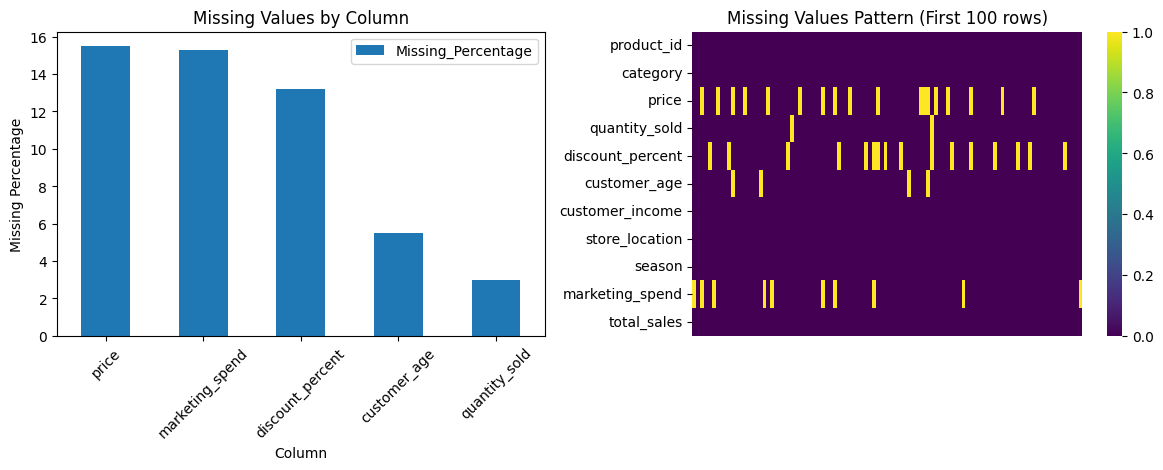


PREPROCESSING FOR IMPUTATION
Data prepared for imputation
Numerical columns: ['price', 'quantity_sold', 'discount_percent', 'customer_age', 'customer_income', 'marketing_spend', 'total_sales']
Categorical columns (encoded): ['category', 'store_location', 'season']

KNN IMPUTATION
KNN Imputation completed
Remaining missing values: 0

MICE (Multiple Imputation by Chained Equations)
MICE Imputation completed
Remaining missing values: 0

COMPARISON OF IMPUTATION METHODS

KNN Imputation Quality Assessment:
price:
  MSE: 465.90
  RMSE: 21.58
  MAE: 17.46
quantity_sold:
  MSE: 4.99
  RMSE: 2.23
  MAE: 1.87
discount_percent:
  MSE: 85.77
  RMSE: 9.26
  MAE: 7.75
customer_age:
  MSE: 206.51
  RMSE: 14.37
  MAE: 11.52
marketing_spend:
  MSE: 80767.64
  RMSE: 284.20
  MAE: 219.31

MICE Imputation Quality Assessment:
price:
  MSE: 493.75
  RMSE: 22.22
  MAE: 17.81
quantity_sold:
  MSE: 4.97
  RMSE: 2.23
  MAE: 1.89
discount_percent:
  MSE: 78.76
  RMSE: 8.87
  MAE: 7.37
customer_age:
  MSE: 184.7

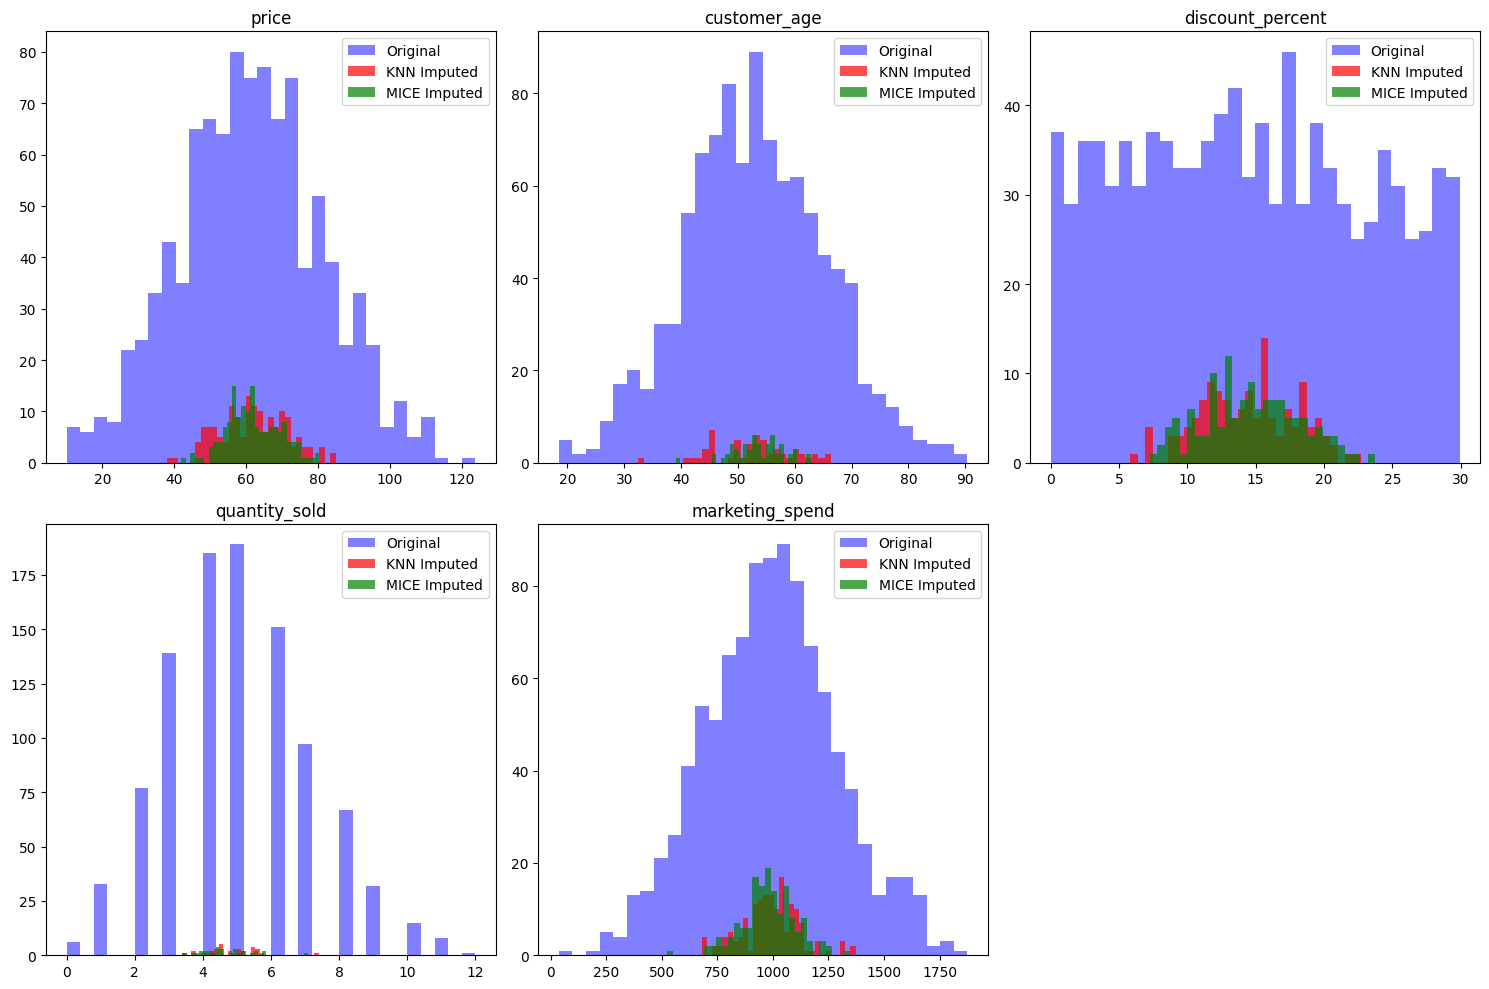


EVALUATION ON DOWNSTREAM TASK
Evaluating imputation methods on downstream prediction task:
Original (Complete Cases) - Downstream Task Performance:
  MSE: 10039.85
  R² Score: -0.1161
KNN Imputed - Downstream Task Performance:
  MSE: 9888.04
  R² Score: -0.0992
MICE Imputed - Downstream Task Performance:
  MSE: 9884.24
  R² Score: -0.0988

SUMMARY AND RECOMMENDATIONS

Imputation Method Comparison Summary:
----------------------------------------
Method               MSE        R² Score  
----------------------------------------
Original (Complete)  10039.85   -0.1161   
KNN Imputation       9888.04    -0.0992   
MICE Imputation      9884.24    -0.0988   

Recommendations:
1. KNN Imputation:
   - Best for: Continuous variables with local patterns
   - Pros: Simple, preserves local structure
   - Cons: Sensitive to scaling, curse of dimensionality

2. MICE Imputation:
   - Best for: Complex relationships between variables
   - Pros: Handles different variable types, captures uncertainty

In [ ]:
# Advanced Missing Values Handling: KNN Imputation and MICE
# Dataset: Retail Sales Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Create a sample retail sales dataset
np.random.seed(42)
n_samples = 1000

# Generate synthetic retail sales data
data = {
    'product_id': range(1, n_samples + 1),
    'category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Sports', 'Books'], n_samples),
    'price': np.random.normal(50, 20, n_samples),
    'quantity_sold': np.random.poisson(5, n_samples),
    'discount_percent': np.random.uniform(0, 30, n_samples),
    'customer_age': np.random.normal(35, 12, n_samples),
    'customer_income': np.random.normal(50000, 15000, n_samples),
    'store_location': np.random.choice(['Urban', 'Suburban', 'Rural'], n_samples),
    'season': np.random.choice(['Spring', 'Summer', 'Fall', 'Winter'], n_samples),
    'marketing_spend': np.random.normal(1000, 300, n_samples),
    'total_sales': np.random.normal(250, 100, n_samples)
}

# Create DataFrame
df = pd.DataFrame(data)

# Ensure positive values where appropriate
df['price'] = np.abs(df['price']) + 10
df['customer_age'] = np.abs(df['customer_age']) + 18
df['customer_income'] = np.abs(df['customer_income']) + 20000
df['marketing_spend'] = np.abs(df['marketing_spend'])
df['total_sales'] = np.abs(df['total_sales']) + 50

print("Original Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# Introduce missing values strategically
def introduce_missing_values(df, missing_rate=0.15):
    df_missing = df.copy()

    # Introduce missing values in different patterns
    # Random missing (MCAR - Missing Completely At Random)
    for col in ['price', 'discount_percent', 'marketing_spend']:
        mask = np.random.random(len(df_missing)) < missing_rate
        df_missing.loc[mask, col] = np.nan

    # Missing dependent on other variables (MAR - Missing At Random)
    # Higher income customers less likely to have age recorded
    high_income_mask = df_missing['customer_income'] > df_missing['customer_income'].quantile(0.8)
    age_missing_mask = np.random.random(len(df_missing)) < 0.3
    df_missing.loc[high_income_mask & age_missing_mask, 'customer_age'] = np.nan

    # Quantity sold missing for expensive items (systematic pattern)
    expensive_mask = df_missing['price'] > df_missing['price'].quantile(0.9)
    quantity_missing_mask = np.random.random(len(df_missing)) < 0.4
    df_missing.loc[expensive_mask & quantity_missing_mask, 'quantity_sold'] = np.nan

    return df_missing

# Introduce missing values
df_with_missing = introduce_missing_values(df)

print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

# Analyze missing values
missing_analysis = pd.DataFrame({
    'Column': df_with_missing.columns,
    'Missing_Count': df_with_missing.isnull().sum(),
    'Missing_Percentage': (df_with_missing.isnull().sum() / len(df_with_missing)) * 100
})
missing_analysis = missing_analysis[missing_analysis['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print("\nMissing Values Summary:")
print(missing_analysis)

# Visualize missing values pattern
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
missing_analysis.plot(x='Column', y='Missing_Percentage', kind='bar', ax=plt.gca())
plt.title('Missing Values by Column')
plt.xticks(rotation=45)
plt.ylabel('Missing Percentage')

plt.subplot(2, 2, 2)
# Missing values heatmap
missing_mask = df_with_missing.isnull()
sns.heatmap(missing_mask.iloc[:100, :].T, cbar=True, yticklabels=True, xticklabels=False, cmap='viridis')
plt.title('Missing Values Pattern (First 100 rows)')

plt.tight_layout()
plt.savefig('missing_values_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("PREPROCESSING FOR IMPUTATION")
print("="*60)

# Prepare data for imputation
# Separate numerical and categorical columns
numerical_cols = ['price', 'quantity_sold', 'discount_percent', 'customer_age', 'customer_income', 'marketing_spend', 'total_sales']
categorical_cols = ['category', 'store_location', 'season']

# Encode categorical variables for imputation
df_for_imputation = df_with_missing.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_for_imputation[col] = le.fit_transform(df_for_imputation[col])
    label_encoders[col] = le

print("Data prepared for imputation")
print("Numerical columns:", numerical_cols)
print("Categorical columns (encoded):", categorical_cols)

print("\n" + "="*60)
print("KNN IMPUTATION")
print("="*60)

# KNN Imputation
# Scale the data for KNN (KNN is distance-based)
scaler = StandardScaler()
df_scaled = df_for_imputation.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')
df_knn_imputed = df_scaled.copy()
df_knn_imputed.iloc[:, :] = knn_imputer.fit_transform(df_scaled)

# Scale back numerical columns
df_knn_imputed[numerical_cols] = scaler.inverse_transform(df_knn_imputed[numerical_cols])

# Decode categorical variables
df_knn_final = df_knn_imputed.copy()
for col in categorical_cols:
    df_knn_final[col] = df_knn_final[col].round().astype(int)
    df_knn_final[col] = label_encoders[col].inverse_transform(df_knn_final[col])

print("KNN Imputation completed")
print("Remaining missing values:", df_knn_final.isnull().sum().sum())

print("\n" + "="*60)
print("MICE (Multiple Imputation by Chained Equations)")
print("="*60)

# MICE Imputation
mice_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=42),
    random_state=42,
    max_iter=10
)

df_mice_imputed = df_for_imputation.copy()
df_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(df_for_imputation)

# Decode categorical variables
df_mice_final = df_mice_imputed.copy()
for col in categorical_cols:
    df_mice_final[col] = df_mice_final[col].round().astype(int)
    # Ensure values are within valid range
    df_mice_final[col] = np.clip(df_mice_final[col], 0, len(label_encoders[col].classes_) - 1)
    df_mice_final[col] = label_encoders[col].inverse_transform(df_mice_final[col])

print("MICE Imputation completed")
print("Remaining missing values:", df_mice_final.isnull().sum().sum())

print("\n" + "="*60)
print("COMPARISON OF IMPUTATION METHODS")
print("="*60)

# Compare imputed values with original values
def compare_imputation_quality(original, missing, imputed, method_name):
    print(f"\n{method_name} Imputation Quality Assessment:")

    results = {}
    for col in numerical_cols:
        if col in missing.columns and missing[col].isnull().sum() > 0:
            # Get positions where values were missing
            missing_mask = missing[col].isnull()

            if missing_mask.sum() > 0:
                original_values = original.loc[missing_mask, col]
                imputed_values = imputed.loc[missing_mask, col]

                # Calculate metrics
                mse = mean_squared_error(original_values, imputed_values)
                rmse = np.sqrt(mse)
                mae = np.mean(np.abs(original_values - imputed_values))

                results[col] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae}

                print(f"{col}:")
                print(f"  MSE: {mse:.2f}")
                print(f"  RMSE: {rmse:.2f}")
                print(f"  MAE: {mae:.2f}")

    return results

# Compare both methods
knn_results = compare_imputation_quality(df, df_with_missing, df_knn_final, "KNN")
mice_results = compare_imputation_quality(df, df_with_missing, df_mice_final, "MICE")

print("\n" + "="*60)
print("VISUALIZATION OF IMPUTED VALUES")
print("="*60)

# Visualize imputation results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

cols_to_plot = ['price', 'customer_age', 'discount_percent', 'quantity_sold', 'marketing_spend']

for i, col in enumerate(cols_to_plot):
    if i < len(axes) and col in df_with_missing.columns:
        ax = axes[i]

        # Original values
        ax.hist(df[col], bins=30, alpha=0.5, label='Original', color='blue')

        # KNN imputed values
        missing_mask = df_with_missing[col].isnull()
        if missing_mask.sum() > 0:
            ax.hist(df_knn_final.loc[missing_mask, col], bins=30, alpha=0.7,
                   label='KNN Imputed', color='red')
            ax.hist(df_mice_final.loc[missing_mask, col], bins=30, alpha=0.7,
                   label='MICE Imputed', color='green')

        ax.set_title(f'{col}')
        ax.legend()

# Remove empty subplots
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('imputation_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("EVALUATION ON DOWNSTREAM TASK")
print("="*60)

# Evaluate imputation quality using a downstream task (predicting total_sales)
def evaluate_imputation_downstream(df_imputed, method_name, target='total_sales'):
    # Prepare features
    feature_cols = [col for col in numerical_cols if col != target] + categorical_cols

    # Encode categorical variables for modeling
    df_model = df_imputed.copy()
    for col in categorical_cols:
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])

    X = df_model[feature_cols]
    y = df_model[target]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predict
    y_pred = rf.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{method_name} - Downstream Task Performance:")
    print(f"  MSE: {mse:.2f}")
    print(f"  R² Score: {r2:.4f}")

    return mse, r2

# Evaluate all methods
print("Evaluating imputation methods on downstream prediction task:")

# Original data (complete cases only)
df_complete = df.dropna()
original_mse, original_r2 = evaluate_imputation_downstream(df_complete, "Original (Complete Cases)")

# KNN imputed
knn_mse, knn_r2 = evaluate_imputation_downstream(df_knn_final, "KNN Imputed")

# MICE imputed
mice_mse, mice_r2 = evaluate_imputation_downstream(df_mice_final, "MICE Imputed")

print("\n" + "="*60)
print("SUMMARY AND RECOMMENDATIONS")
print("="*60)

print("\nImputation Method Comparison Summary:")
print("-" * 40)
print(f"{'Method':<20} {'MSE':<10} {'R² Score':<10}")
print("-" * 40)
print(f"{'Original (Complete)':<20} {original_mse:<10.2f} {original_r2:<10.4f}")
print(f"{'KNN Imputation':<20} {knn_mse:<10.2f} {knn_r2:<10.4f}")
print(f"{'MICE Imputation':<20} {mice_mse:<10.2f} {mice_r2:<10.4f}")

print("\nRecommendations:")
print("1. KNN Imputation:")
print("   - Best for: Continuous variables with local patterns")
print("   - Pros: Simple, preserves local structure")
print("   - Cons: Sensitive to scaling, curse of dimensionality")

print("\n2. MICE Imputation:")
print("   - Best for: Complex relationships between variables")
print("   - Pros: Handles different variable types, captures uncertainty")
print("   - Cons: Computationally intensive, requires more tuning")

print("\n3. Choice depends on:")
print("   - Data size and computational resources")
print("   - Missing data mechanism (MCAR, MAR, MNAR)")
print("   - Downstream task requirements")
print("   - Need for uncertainty quantification")

# Save results
print(f"\nDatasets saved:")
print(f"- Original dataset: {df.shape[0]} rows")
print(f"- Dataset with missing values: {df_with_missing.shape[0]} rows")
print(f"- KNN imputed dataset: {df_knn_final.shape[0]} rows")
print(f"- MICE imputed dataset: {df_mice_final.shape[0]} rows")

# Export datasets for further analysis
df.to_csv('original_dataset.csv', index=False)
df_with_missing.to_csv('dataset_with_missing.csv', index=False)
df_knn_final.to_csv('knn_imputed_dataset.csv', index=False)
df_mice_final.to_csv('mice_imputed_dataset.csv', index=False)

print("\nAll datasets exported as CSV files for further analysis!")

HTTPError: HTTP Error 404: Not Found